## 1. Class Boundaries and Posterior Probabilities

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

NumDataPerClass = 500
# Two-class problem, distinct means, equal covariance matrices
#
m1 = np.array([0,3])
m2 = np.array([3,2.5])
C1 = np.array([[2,1], [1,2]], np.float32) # Covariance matrix of the Gaussian
# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A = np.linalg.cholesky(C1)
U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2


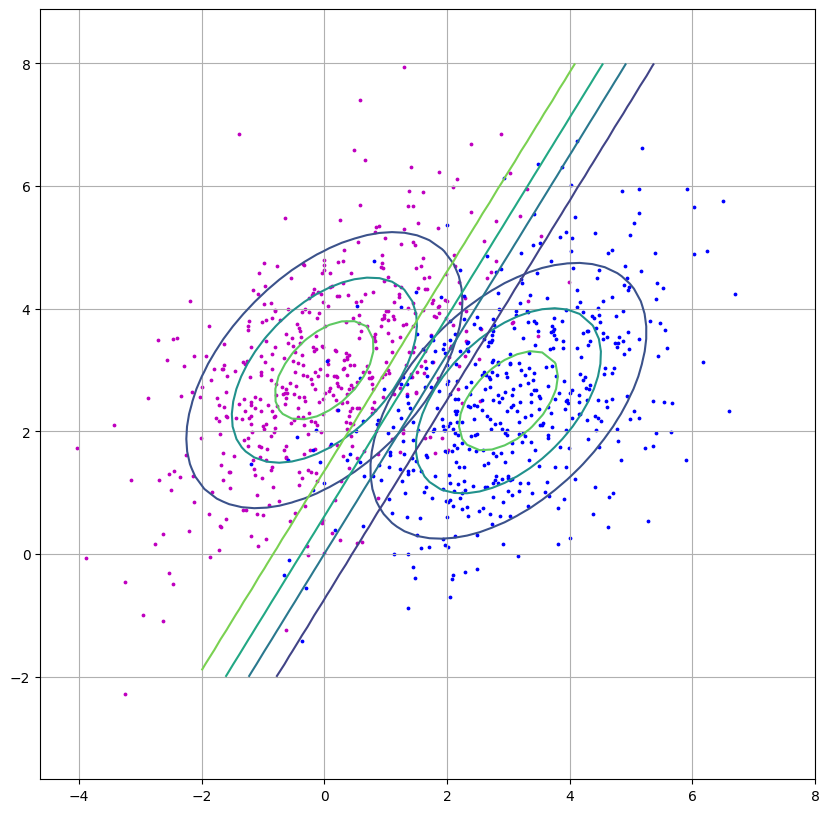

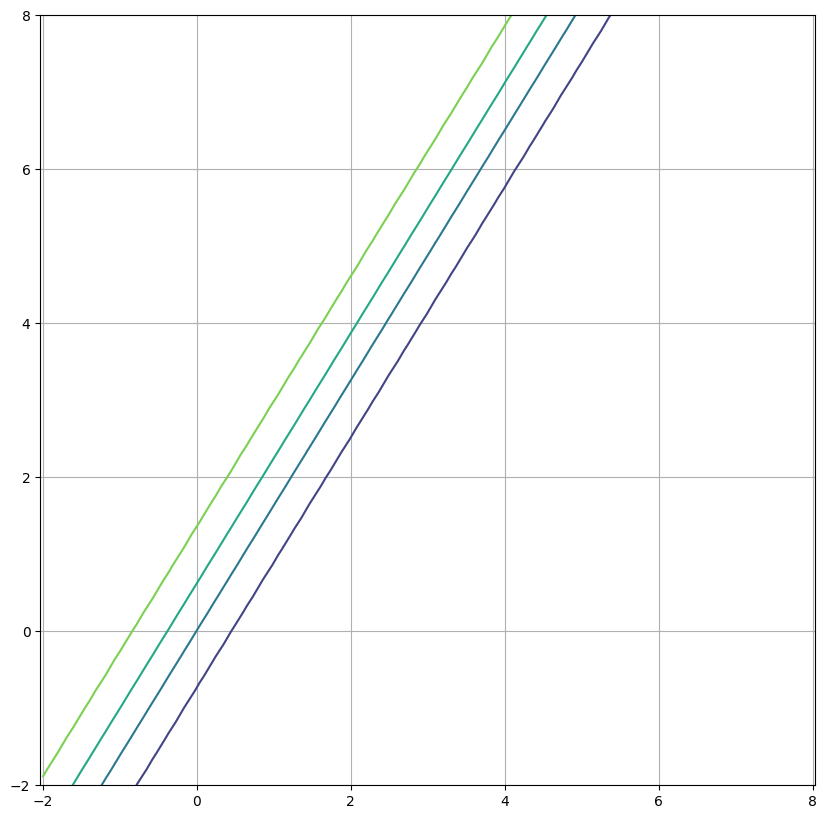

In [3]:
%matplotlib inline

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)  # Inverse of covariance matrix
    dC = np.linalg.det(C)  # Determinant of covariance matrix
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))  # Numerator of the Gaussian function
    den = 2 * np.pi * dC  # Denominator of the Gaussian function
    return num/den

# Function to plot 2D Gaussian
def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-4, 6, nx)  # Create x coordinates
    y = np.linspace(-2, 8, ny)  # Create y coordinates
    X, Y = np.meshgrid(x, y, indexing='ij')  # Create a meshgrid
    Z = np.zeros([nx, ny])  # Initialize Z to zeros
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])  # Create a vector from X and Y coordinates
            Z[i,j] = gauss2D(xvec, m, C)  # Calculate the Gaussian value for the vector
    return X, Y, Z
nx, ny = 50, 50 # Number of x and y coordinates

plt.figure(figsize=(10,10))
plt.scatter(X1[:, 0], X1[:, 1], c="m", label='X1', s=3)

# Plot X2 with reduced dot size
plt.scatter(X2[:, 0], X2[:, 1], c="b", label='X2', s=3)

Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1) # Plot the Gaussian
X2p, Y2p, Z2p = twoDGaussianPlot (nx, ny, m2, C1) # Plot the Gaussian
plt.contour(Xp, Yp, Zp, 4) # Plot the contours
plt.contour(X2p, Y2p, Z2p, 4) # Plot the contours
plt.axis('equal') # Set the aspect ratio to be equal
plt.grid(True)

def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
    x = np.linspace(-2, 8, nx)
    y = np.linspace(-2, 8, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')

    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            num = P1*gauss2D(xvec, m1, C1)
            den = P1*gauss2D(xvec, m1, C1) + P2*gauss2D(xvec, m2, C2)
            Z[i,j] = num / den
    return X, Y, Z

Xp, Yp, Zp = posteriorPlot(nx, ny, m1, C1, m2, C1, 0.5, 0.5)  # Calculate the posterior plot
plt.contour(Xp, Yp, Zp, 4)
plt.savefig('output_1.png')

plt.figure(figsize=(10,10))  # Create a new figure with specified size
plt.contour(Xp, Yp, Zp, 4)  # Plot the contours
plt.axis('equal')  # Set the aspect ratio to be equal
plt.grid(True)  # Add a grid
plt.show()  # Show the plot



In [4]:
NumDataPerClass = 500
# Two-class problem, distinct means, equal covariance matrices
#
m1 = np.array([0,3])
m2 = np.array([3,2.5])
C1 = np.array([[2,1], [1,2]], np.float32) # Covariance matrix of the Gaussian
# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A = np.linalg.cholesky(C1)
U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2


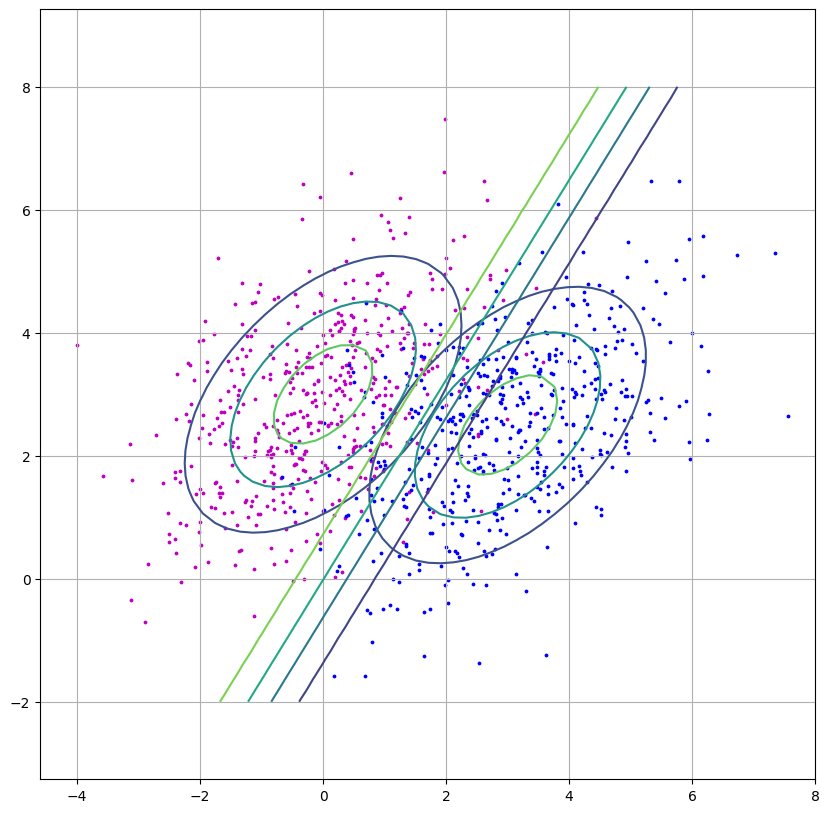

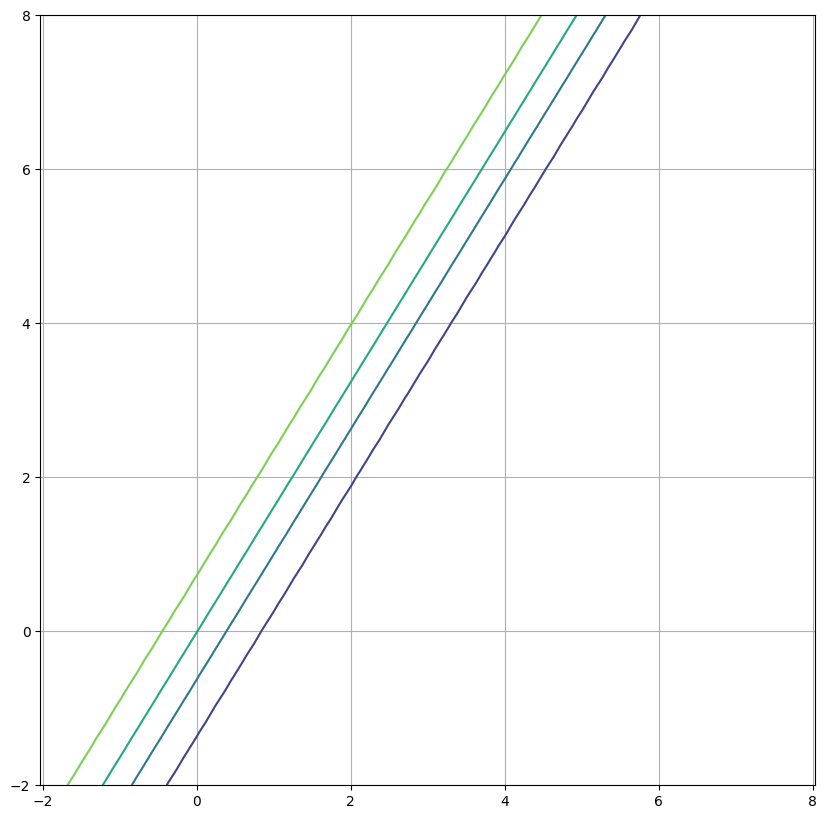

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(X1[:, 0], X1[:, 1], c="m", label='X1', s=3)

# Plot X2 with reduced dot size
plt.scatter(X2[:, 0], X2[:, 1], c="b", label='X2', s=3)

Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1) # Plot the Gaussian
X2p, Y2p, Z2p = twoDGaussianPlot (nx, ny, m2, C1) # Plot the Gaussian
plt.contour(Xp, Yp, Zp, 4) # Plot the contours
plt.contour(X2p, Y2p, Z2p, 4) # Plot the contours
plt.axis('equal') # Set the aspect ratio to be equal
plt.grid(True)

Xp, Yp, Zp = posteriorPlot(nx, ny, m1, C1, m2, C1, 0.7, 0.3)
plt.contour(Xp, Yp, Zp, 4)
plt.savefig('output_2.png')

plt.figure(figsize=(10,10))
plt.contour(Xp, Yp, Zp, 4)
plt.axis('equal') # Set the aspect ratio to be equal
plt.grid(True)

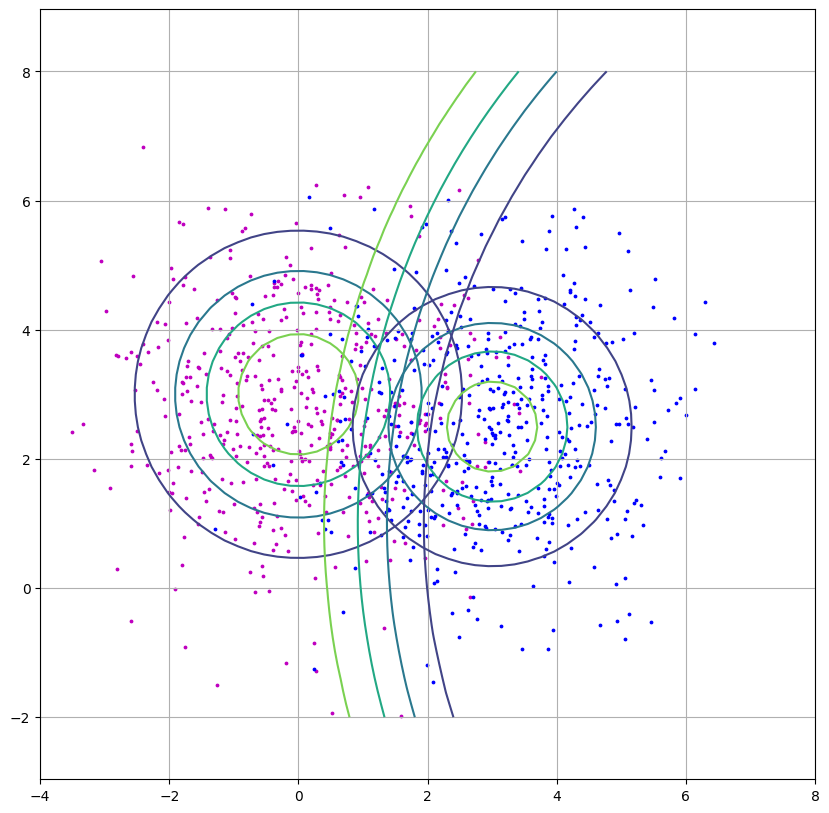

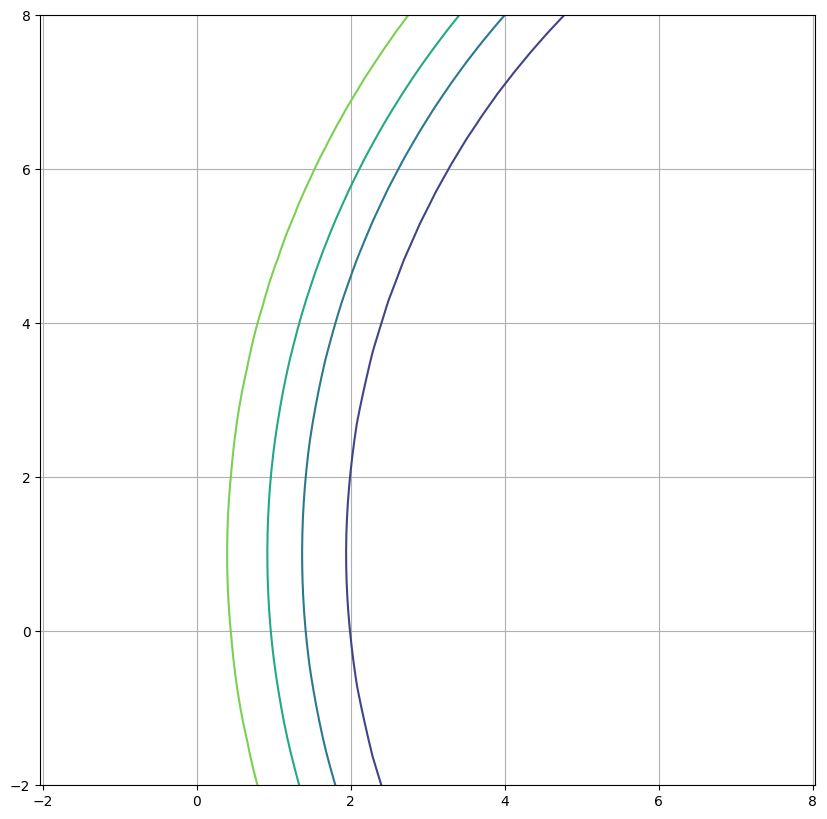

In [6]:
NumDataPerClass = 500
# Two-class problem, distinct means, equal covariance matrices
#
m1 = np.array([0,3])
m2 = np.array([3,2.5])
C1 = np.array([[2,0], [0,2]], np.float32) # Covariance matrix of the Gaussian
C2 = np.array([[1.5,0], [0,1.5]], np.float32) # Covariance matrix of the Gaussian
# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A = np.linalg.cholesky(C1)
U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2

plt.figure(figsize=(10,10))
plt.scatter(X1[:, 0], X1[:, 1], c="m", label='X1', s=3)

# Plot X2 with reduced dot size
plt.scatter(X2[:, 0], X2[:, 1], c="b", label='X2', s=3)

Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1) # Plot the Gaussian
X2p, Y2p, Z2p = twoDGaussianPlot (nx, ny, m2, C2) # Plot the Gaussian
plt.contour(Xp, Yp, Zp, 4) # Plot the contours
plt.contour(X2p, Y2p, Z2p, 4) # Plot the contours
plt.axis('equal') # Set the aspect ratio to be equal
plt.grid(True)

Xp, Yp, Zp = posteriorPlot(nx, ny, m1, C1, m2, C2, 0.5, 0.5)
plt.contour(Xp, Yp, Zp, 4)
plt.savefig('output_3.png')

plt.figure(figsize=(10,10))
plt.contour(Xp, Yp, Zp, 4)
plt.axis('equal') # Set the aspect ratio to be equal
plt.grid(True)

## 2. Fisher LDA and ROC Curve

[[ 0.33333334 -0.16666667]
 [-0.16666667  0.33333334]]
[ 1.08333337 -0.66666669]


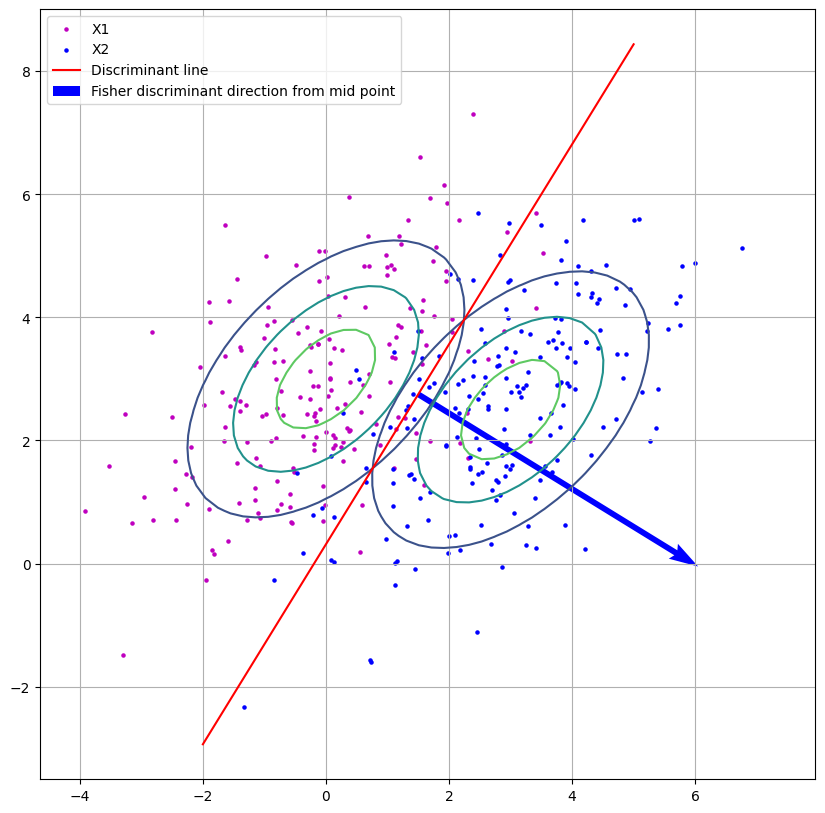

Classification Accuracy =  89.75


In [7]:
NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
#
m1 = np.array([0,3])
m2 = np.array([3,2.5])
C1 = np.array([[2,1], [1,2]], np.float32) # Covariance matrix of the Gaussian

# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A = np.linalg.cholesky(C1)
U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2

U1_test = np.random.randn(NumDataPerClass,2)
X1_test = U1_test @ A.T + m1
U2_test = np.random.randn(NumDataPerClass,2)
X2_test = U2_test @ A.T + m2

plt.figure(figsize=(10,10))
plt.scatter(X1[:, 0], X1[:, 1], c="m", label='X1', s=5)

# Plot X2 with reduced dot size
plt.scatter(X2[:, 0], X2[:, 1], c="b", label='X2', s=5)

Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1) # Plot the Gaussian
X2p, Y2p, Z2p = twoDGaussianPlot (nx, ny, m2, C1) # Plot the Gaussian
plt.contour(Xp, Yp, Zp, 4) # Plot the contours
plt.contour(X2p, Y2p, Z2p, 4) # Plot the contours
plt.axis('equal') # Set the aspect ratio to be equal
plt.grid(True)

Ci = np.linalg.inv(2*C1)
print(Ci)
uF = Ci @ (m2-m1)
print(uF)
yp1 = X1 @ uF
yp2 = X2 @ uF
# Calculate the slope and intercept for the discriminant line
slope = -uF[0] / uF[1]


intercept = (m1[1] + m2[1]) / 2 - slope * (m1[0] + m2[0]) / 2

# Generate x values
x = np.linspace(-2, 5, 400)
# Generate y values
y = slope * x + intercept

# Plot the discriminant line
plt.plot(x, y, '-r', label='Discriminant line')

# Plot the Fisher discriminant direction line
mid_point = (m1 + m2) / 2
plt.quiver(mid_point[0], mid_point[1], uF[0], uF[1], color='b', scale=3, label='Fisher discriminant direction from mid point')

plt.legend()
plt.show()

# Compute the classification for X1_test and X2_test
yp1_test = X1_test @ uF
yp2_test = X2_test @ uF

# Classify based on the discriminant line
y1_test_classified = yp1_test > intercept
y2_test_classified = yp2_test > intercept

# Compute the accuracy for each class
accuracy_X1 = np.sum(y1_test_classified == 0) / len(y1_test_classified)
accuracy_X2 = np.sum(y2_test_classified == 1) / len(y2_test_classified)

# Compute the overall accuracy
overall_accuracy = (accuracy_X1 + accuracy_X2) / 2

print("Classification Accuracy = ",overall_accuracy*100)



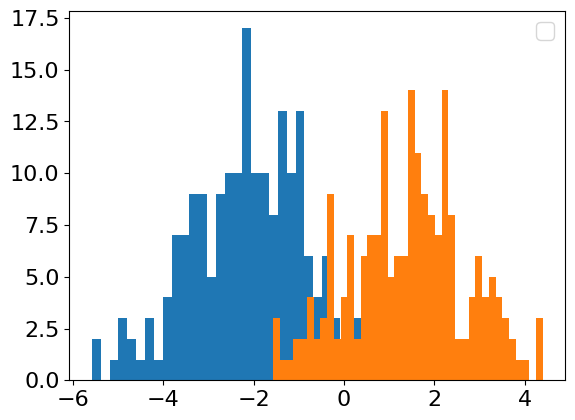

In [8]:
import matplotlib
import numpy as np

Ci = np.linalg.inv(2*C1)
uF = Ci @ (m2-m1)
yp1 = X1 @ uF
yp2 = X2 @ uF
matplotlib.rcParams.update({'font.size': 16})
plt.hist(yp1, bins=40)
plt.hist(yp2, bins=40)

plt.legend(loc='upper right')  # Add a legend
plt.savefig('histogramprojections.png')



-5.580357788844132 4.403592782330227


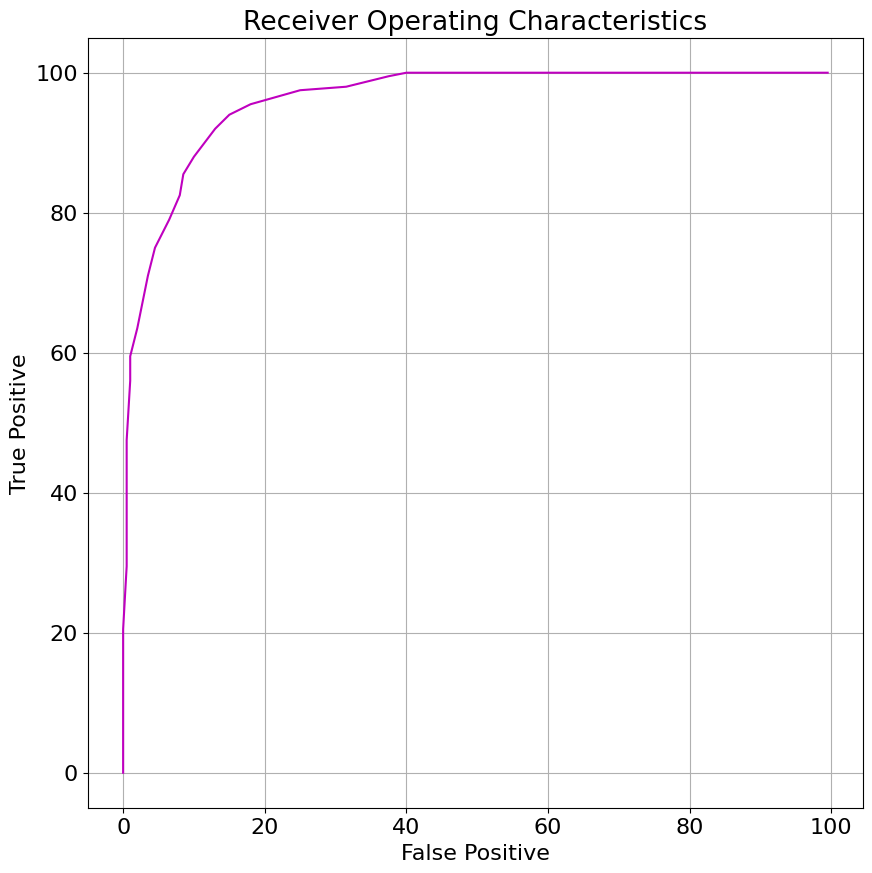

In [9]:
# Define a range over which to slide a threshold
#
pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
print(pmin, pmax)
# Set up an array of thresholds
#
nRocPoints = 50;
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold
#
for i in range(len(thRange)):
    thresh = thRange[i]
    TP = len(yp2[yp2 > thresh]) * 100 / len(yp2)
    FP = len(yp1[yp1 > thresh]) * 100 / len(yp1)
    ROC[i,:] = [TP, FP]
# Plot ROC curve
#
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(ROC[:,1], ROC[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
plt.savefig('rocCurve.png')


In [10]:
import numpy as np

# Assuming ROC[:, 0] is the x-axis (False Positive Rate) and ROC[:, 1] is the y-axis (True Positive Rate)
area_under_curve = -np.trapz(ROC[:, 0], ROC[:, 1])
area_under_curve


9564.0

-9.031219603441512 24.262426804868632
AUC Fisher LD: 9564.0
AUC Random direction: 8397.875
AUC Mean direction: 2276.75


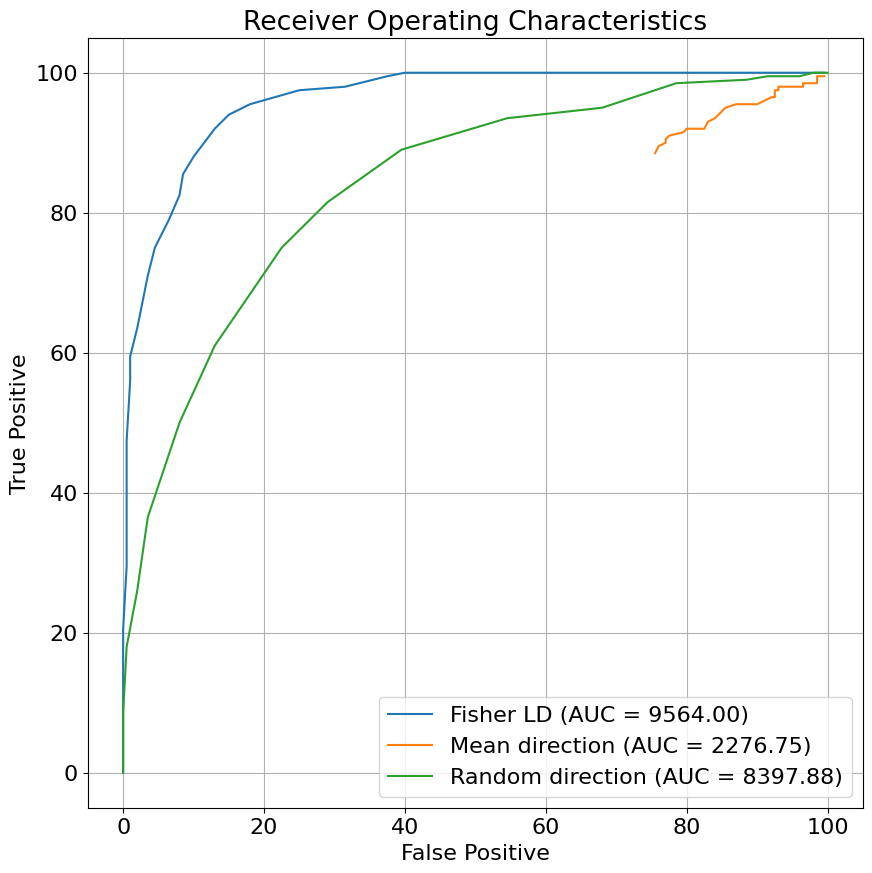

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from scipy.stats import multivariate_normal

#
nRocPoints = 50;
thRange = np.linspace(pmin, pmax, nRocPoints)

# Random direction
uRandom = np.random.rand(2)
yp1_random = X1 @ uRandom
yp2_random = X2 @ uRandom

# Mean direction
uMean = (m1 + m2) / 2
yp1_mean = X1 @ uMean
yp2_mean = X2 @ uMean

# Define a range over which to slide a threshold
pmin = np.min(np.array((np.min(yp1), np.min(yp2), np.min(yp1_random), np.min(yp2_random), np.min(yp1_mean), np.min(yp2_mean))))
pmax = np.max(np.array((np.max(yp1), np.max(yp2), np.max(yp1_random), np.max(yp2_random), np.max(yp1_mean), np.max(yp2_mean))))
print(pmin, pmax)

def get_ROC_AUC(yp1, yp2, thRange):
    ROC = np.zeros((nRocPoints, 2))
    for i in range(len(thRange)):
        thresh = thRange[i]
        TP = len(yp2[yp2 > thresh]) * 100 / len(yp2)
        FP = len(yp1[yp1 > thresh]) * 100 / len(yp1)
        ROC[i,:] = [TP, FP]
    AUC = -np.trapz(ROC[:, 0], ROC[:, 1])
    return ROC, AUC

# Get ROC and AUC
ROCFisher, AUCFisher = get_ROC_AUC(yp1, yp2, thRange)
ROCRandom, AUCRandom = get_ROC_AUC(yp1_random, yp2_random, thRange)
ROCMean, AUCMean = get_ROC_AUC(yp1_mean, yp2_mean, thRange)

# Print AUC
print('AUC Fisher LD:', AUCFisher)
print('AUC Random direction:', AUCRandom)
print('AUC Mean direction:', AUCMean)

# Plot all ROC curves
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(ROCFisher[:,1], ROCFisher[:,0], label='Fisher LD (AUC = %0.2f)' % AUCFisher)
ax.plot(ROCMean[:,1], ROCMean[:,0], label='Mean direction (AUC = %0.2f)' % AUCMean)
ax.plot(ROCRandom[:,1], ROCRandom[:,0], label='Random direction (AUC = %0.2f)' % AUCRandom)
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.legend(loc="lower right")
ax.grid(True)
plt.savefig('rocCurve.png')

## 3. Mahalanobis Distance

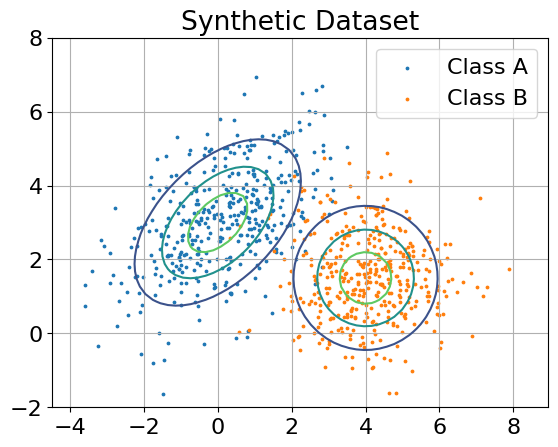

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Generate synthetic data
np.random.seed(0)
mean_A = np.array([0,3])
cov_A = np.array([[2,1], [1,2]], np.float32)
mean_B = np.array([4,1.5])
cov_B = np.array([[1.5, 0], [0, 1.5]], np.float32)

data_A = np.random.multivariate_normal(mean_A, cov_A, 400)
data_B = np.random.multivariate_normal(mean_B, cov_B, 400)

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)  # Inverse of covariance matrix
    dC = np.linalg.det(C)  # Determinant of covariance matrix
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))  # Numerator of the Gaussian function
    den = 2 * np.pi * dC  # Denominator of the Gaussian function
    return num/den

# Function to plot 2D Gaussian
def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-4, 6, nx)  # Create x coordinates
    y = np.linspace(-2, 8, ny)  # Create y coordinates
    X, Y = np.meshgrid(x, y, indexing='ij')  # Create a meshgrid
    Z = np.zeros([nx, ny])  # Initialize Z to zeros
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])  # Create a vector from X and Y coordinates
            Z[i,j] = gauss2D(xvec, m, C)  # Calculate the Gaussian value for the vector
    return X, Y, Z
nx, ny = 50, 50 # Number of x and y coordinates



Xp, Yp, Zp = twoDGaussianPlot (nx, ny, mean_A, cov_A) # Plot the Gaussian
X2p, Y2p, Z2p = twoDGaussianPlot (nx, ny, mean_B, cov_B) # Plot the Gaussian
plt.contour(Xp, Yp, Zp, 4) # Plot the contours
plt.contour(X2p, Y2p, Z2p, 3) # Plot the contours
plt.axis('equal') # Set the aspect ratio to be equal
plt.grid(True)

# Plot the dataset
plt.scatter(data_A[:,0], data_A[:,1], label='Class A', s=3)
plt.scatter(data_B[:,0], data_B[:,1], label='Class B', s=3)

plt.title('Synthetic Dataset')
plt.legend()
plt.grid(True)
plt.show()




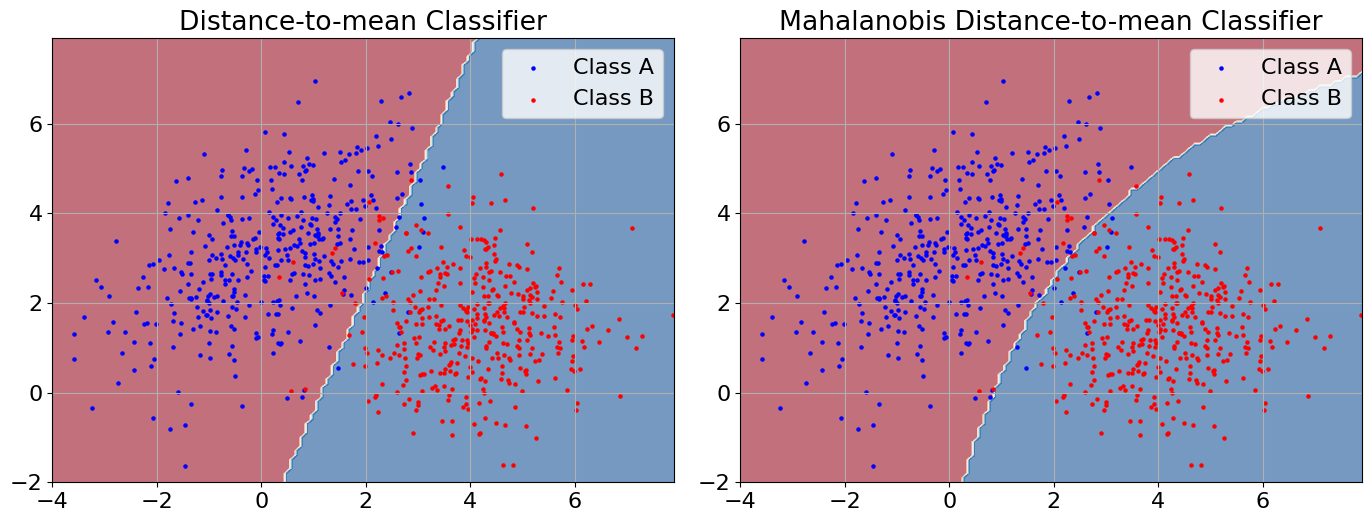

In [13]:
# Distance-to-mean classifier
def distance_to_mean_classifier(x, mean_A, mean_B):
    dist_A = np.linalg.norm(x - mean_A)
    dist_B = np.linalg.norm(x - mean_B)
    if dist_A < dist_B:
        return 0  # Class A
    else:
        return 1  # Class B

# Mahalanobis distance-to-mean classifier
def mahalanobis_distance_classifier(x, mean_A, cov_A, mean_B, cov_B):
    mahalanobis_dist_A = np.sqrt((x - mean_A).T @ np.linalg.inv(cov_A) @ (x - mean_A))
    mahalanobis_dist_B = np.sqrt((x - mean_B).T @ np.linalg.inv(cov_B) @ (x - mean_B))
    if mahalanobis_dist_A < mahalanobis_dist_B:
        return 0  # Class A
    else:
        return 1  # Class B

# Generate grid points for decision boundary visualization
x_min, x_max = -4, 8
y_min, y_max = -2, 8
step = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict using both classifiers for each grid point
predictions_distance_to_mean = np.array([distance_to_mean_classifier(point, mean_A, mean_B) for point in grid_points])
predictions_mahalanobis_distance = np.array([mahalanobis_distance_classifier(point, mean_A, cov_A, mean_B, cov_B) for point in grid_points])

# Reshape predictions to match grid shape
predictions_distance_to_mean = predictions_distance_to_mean.reshape(xx.shape)
predictions_mahalanobis_distance = predictions_mahalanobis_distance.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(14, 5.5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, predictions_distance_to_mean, cmap=plt.cm.RdBu, alpha=0.6)
plt.scatter(data_A[:, 0], data_A[:, 1], label='Class A', c='blue', s=5)
plt.scatter(data_B[:, 0], data_B[:, 1], label='Class B', c='red', s=5)
plt.title('Distance-to-mean Classifier')

plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, predictions_mahalanobis_distance, cmap=plt.cm.RdBu, alpha=0.6)
plt.scatter(data_A[:, 0], data_A[:, 1], label='Class A', c='blue', s=5)
plt.scatter(data_B[:, 0], data_B[:, 1], label='Class B', c='red', s=5)
plt.title('Mahalanobis Distance-to-mean Classifier')

plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

